In [1]:
import sys; sys.path.insert(0, '..')

In [2]:
import pandas as pd
import re
from tqdm import notebook
from re import compile
from utils.regex_fx import remove_single_char, remove_numbers, remove_urls, remove_emojis, remove_extra_spaces, remove_rt, remove_mention, remove_nonalpha, remove_non_ascii, remove_special_words, remove_nt
from collections import Counter
import spacy
nlp = spacy.load("en_core_web_sm")
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import itertools

In [3]:
pf = pd.read_csv('../processed-data/tweet_times/politifact_fake_tweet_times.csv')

In [4]:
def cleanup(text):
    res = remove_mention(text)
    res = remove_non_ascii(res)
    res = res.lower()
    res = remove_urls(res)
    res = remove_rt(res)
    res = remove_single_char(res)
    res = remove_numbers(res)
    res = remove_emojis(res)
    res = remove_nonalpha(res)
    res = remove_extra_spaces(res)
    res = remove_special_words(res)
    res = remove_nt(res)
    return res

In [5]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
def quick_similar(a, b):
    return SequenceMatcher(None, a, b).quick_ratio()

In [6]:
cleaned_pf_text = []
for item in pf.text:
    cleaned_pf_text.append(cleanup(item))
pf.text = cleaned_pf_text

In [14]:
pf = pf.drop_duplicates(subset=['text'], keep='first')
pf = pf.sort_values('text')
pf = pf[pf.text.notnull()]
pf = pf[pf.text != ""]
pf = pf[pf.text.str.len() > 100]

In [15]:
for name, group in pf.groupby('news_id'):
    for a, b in notebook.tqdm(itertools.combinations(group.text, 2)):
        if similar(a,b) > 0.80:
            pf = pf[pf.text != a]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [17]:
pf.to_csv('pf_0.8_similarity_filtered.csv')

In [9]:
pf = pf[pf.text.notnull()]
pf = pf[pf.text != ""]
pf = pf[pf.text.str.len() > 15]

In [10]:
pf = pf.drop(columns=['Unnamed: 0', 'withheld'])

In [11]:
text_list = pf.text.unique()
processed_texts = [text for text in notebook.tqdm(nlp.pipe(text_list, 
                                                n_process=-1, # maximum number of threads
                                                disable=["ner", "parser"]),
                                                total=len(text_list))]

  0%|          | 0/32654 [00:00<?, ?it/s]

In [12]:
tokenized_texts = [[word.lemma_ for word in lemma_ if not word.is_punct if not word.is_stop] for lemma_ in notebook.tqdm(processed_texts)]

  0%|          | 0/32654 [00:00<?, ?it/s]

In [13]:
from gensim.models import Phrases
def make_n_grams(docs):
    # Add bigrams and trigrams to docs (only ones that appear 20 times or more).
    bigram = Phrases(docs, min_count=1)
    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                docs[idx].append(token)
    return docs

In [14]:
def process_tokenized(tokenized_texts):
    # tokenized_texts = make_n_grams(tokenized_texts)
    flatten = lambda t: [item for sublist in t for item in sublist]
    flattened = flatten(tokenized_texts)
    counts = Counter(flattened)
    total_words = sum(counts.values()) 
    for word in counts:
        counts[word] = counts[word] #* (10000) / total_words
    return counts, counts.most_common(), flattened, tokenized_texts

In [15]:
tokenized_obj = process_tokenized(tokenized_texts)
counts_fake, common_fake, flattened_fake, tokenized_texts_fake = tokenized_obj

In [16]:
common_fake[:20]

[('house', 10011),
 ('representative', 8941),
 ('america', 7128),
 ('wake', 6204),
 ('nt', 3301),
 ('federal', 2573),
 ('vote', 2507),
 ('regulation', 2055),
 ('code', 2044),
 ('people', 2032),
 ('wakeupamerica', 2009),
 ('state', 1655),
 ('president', 1465),
 ('need', 1463),
 ('senate', 1441),
 ('s', 1417),
 ('like', 1391),
 ('american', 1324),
 ('time', 1239),
 ('shut', 1191)]

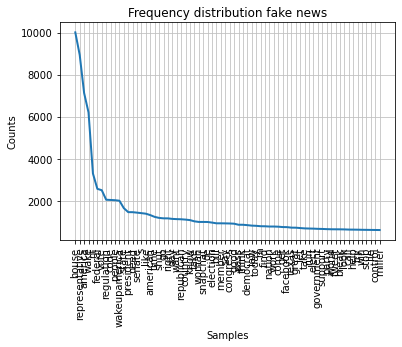

<AxesSubplot:title={'center':'Frequency distribution fake news'}, xlabel='Samples', ylabel='Counts'>

In [17]:
import nltk
from nltk import FreqDist
fdist_filtered = FreqDist(counts_fake)
fdist_filtered.plot(70,title='Frequency distribution fake news')

In [18]:
from gensim.models import LdaMulticore

def compute_coherence_values(texts, start, step, limit, topn):
    dictionary = Dictionary(texts) # get the vocabulary
    dictionary.filter_extremes(no_below=5, no_above=0.5)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    coherence_values = []
    model_list = []
    for num_topics in notebook.tqdm(range(start, limit, step)):
        model = LdaMulticore( corpus=corpus, num_topics=num_topics, id2word=dictionary, alpha = 0.01, iterations = 400)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v', topn=topn)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
model_list, coherence_values = compute_coherence_values(texts=tokenized_texts_fake, start=1, step=1, limit= 40, topn=5)

  0%|          | 0/39 [00:00<?, ?it/s]

In [20]:
coherence_values

[0.13393146250501947,
 0.1343803269903661,
 0.14019567495999824,
 0.1648137076899704,
 0.25445677242093556,
 0.2505157992762727,
 0.21111787016750014,
 0.18486966828344106,
 0.2230518053736249,
 0.23249222438666672,
 0.25030917985405393,
 0.2661925495394973,
 0.31163094871906394,
 0.29237399604180314,
 0.2675440988802656,
 0.32139376114829776,
 0.3006638532671014,
 0.3302417006703891,
 0.27449818315109975,
 0.28381154860047764,
 0.3031607319745378,
 0.2609841459847825,
 0.25147157951153004,
 0.26981368397950356,
 0.31308839643890535,
 0.30379884899781867,
 0.39170378062007816,
 0.29232028032031987,
 0.27604683150042003,
 0.33025392643680684,
 0.2947086091413386,
 0.3117786969069001,
 0.2934304936241559,
 0.30493657181436445,
 0.2927578035915313,
 0.2874798083325689,
 0.29012147439342306,
 0.27605112739802085,
 0.2827363405570254]

In [21]:
from gensim.corpora import Dictionary

In [22]:
MIN_DF = 5 # minium document frequency
MAX_DF = 0.5 # maximum document frequency

dictionary = Dictionary(tokenized_texts_fake) # get the vocabulary
dictionary.filter_extremes(no_below=MIN_DF, 
                           no_above=MAX_DF)
corpus = [dictionary.doc2bow(text) for text in notebook.tqdm(tokenized_texts_fake)]

  0%|          | 0/32654 [00:00<?, ?it/s]

In [23]:
N_TOPICS = 6
N_ITERATIONS = 1000

lda = LdaMulticore(
                corpus=corpus,
                id2word=dictionary,
                num_topics=N_TOPICS,
                iterations=N_ITERATIONS)
                
for topic in range(N_TOPICS):
    words = lda.show_topic(topic, 10)
    topic_n_words = ' '.join([word[0] for word in words])
    print('Topic {}: {}'.format(str(topic), topic_n_words))

Topic 0: house representative vote president nt senate america state people member
Topic 1: america wake house representative wakeupamerica vote nt time need people
Topic 2: house representative whale dead nt killer eat alive crew whaling
Topic 3: wakeupamerica nt house representative like wake america tweet texas s
Topic 4: america wake nt house people american representative want s country
Topic 5: federal code regulation house america fake nt wake representative right


In [24]:
pf.to_csv('fake.csv')

In [25]:
def topic_modelling_results(tokenized_text, n_topics, n_iterations):
    results = []

    dictionary = Dictionary(tokenized_text) # get the vocabulary
    corpus = [dictionary.doc2bow(text) for text in tokenized_text]

    N_TOPICS = n_topics
    N_ITERATIONS = n_iterations
    
    lda = LdaMulticore(
                corpus=corpus,
                id2word=dictionary,
                num_topics=N_TOPICS,
                iterations=N_ITERATIONS)
    
    for topic in range(N_TOPICS):
        words = lda.show_topic(topic)
        topic_n_words = ' '.join([word[0] for word in words])
        result = {'Topic':str(topic), 
                    'Words':topic_n_words}
        results.append(result)
    results_DF = pd.DataFrame(results)
    pd.set_option('display.max_colwidth', None)
    return results_DF, lda, dictionary

In [26]:
all_scores = []
for n in range(5, 15, 5):
    model_list, coherence_values = compute_coherence_values(texts=tokenized_texts, start=1, step=1, limit= 40, topn=n)
    all_scores.append(coherence_values)

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

In [30]:
import numpy as np

In [31]:
all_scores = np.array(all_scores)
avg_scores = np.average(all_scores, axis=0)

In [32]:
print(avg_scores)

[0.17560005 0.14319282 0.18117529 0.33499002 0.26743908 0.22502305
 0.21701307 0.26181757 0.23844677 0.26681203 0.23681913 0.2733988
 0.26775501 0.28021123 0.22379233 0.24657096 0.26722357 0.28367491
 0.24663477 0.26356453 0.28869202 0.28881576 0.26276264 0.26588593
 0.28089384 0.2620677  0.2811831  0.29248616 0.2921929  0.27210704
 0.31195152 0.31060963 0.27909672 0.2990661  0.27536198 0.30059556
 0.28769733 0.27797478 0.28711159]


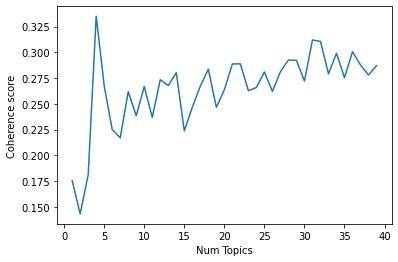

In [33]:
import matplotlib.pyplot as plt
limit=40; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, avg_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
#plt.title("")
plt.show()